# measurement of events from $^{252}$Cf fission
$^{252}$Cf source activity is 1 uC

In [1]:
import sys; 
sys.path.insert(0, '/Users/erezcohen/Desktop/PETsys/Software/PETsysAnalysis/Python'); 
from PETsys_analysis_tools import *;
sys.path.insert(0, '/Users/erezcohen/Desktop/PETsys/Software/PETsysAnalysis/Python/BoxSi'); 
from proto21_tools import *;
%config InlineBackend.figure_format = 'retina'

/Users/erezcohen/Desktop/PETsys/Software/PETsysAnalysis/Python/BoxSi/proto21_tools.py:10: SyntaxWarning: import * only allowed at module level
  def process_SiPMgroups_to_events(groups, NSiPM_min=3, dT=100, fdebug=0):#{


In [68]:
dT = 1000; # sec
Cf252_groups = pd.read_csv('/Users/erezcohen/Desktop/data/PETsys/BoxSi_proto2.1/Cf252_%dsec_group.dat'%dT,
                            delimiter='\t',
                            names=['N(SiPMs)','n(SiPM)','time','charge','channel'])

## group cosmic event-groups into single "events" detected in each detector

In [69]:
events,KETEK_events,SensL_events = process_SiPMgroups_to_events(Cf252_groups, dT=dT, NSiPM_min=2,fdebug=0);
events[0:10]

0.0 %
10.0 %
20.0 %
30.0 %
40.0 %
50.0 %
60.0 %
70.0 %
80.0 %
90.0 %
100.0 %
(85497, 'events during', 1000, 'seconds, with average rate 85.00+/-0.29 Hz')
('4.4', '% in detector 12 (KETEK)')
('4.2', '% in detector 3 (KETEK)')
('39.4', '% in detector 6 (SensL)')
('33.8', '% in detector 9 (SensL)')


,N(SiPMs),Qtot,det.type,detector,event,time[ns]
0,4.0,22.207932,unknown,0,0,8.696676e+08
1,2.0,9.615147,unknown,0,1,8.896296e+08
2,2.0,4.977763,SensL 6x6 - 2,9,2,9.148038e+08
3,4.0,15.273619,unknown,0,3,9.159961e+08
4,2.0,2.687408,SensL 6x6 - 1,6,4,9.262916e+08
5,2.0,3.752633,SensL 6x6 - 2,9,5,9.289830e+08
6,2.0,5.553262,unknown,0,6,9.471621e+08
7,2.0,14.189273,unknown,0,7,9.667094e+08
8,2.0,5.319403,SensL 6x6 - 2,9,8,9.909998e+08
9,2.0,15.088879,unknown,0,9,1.001221e+09


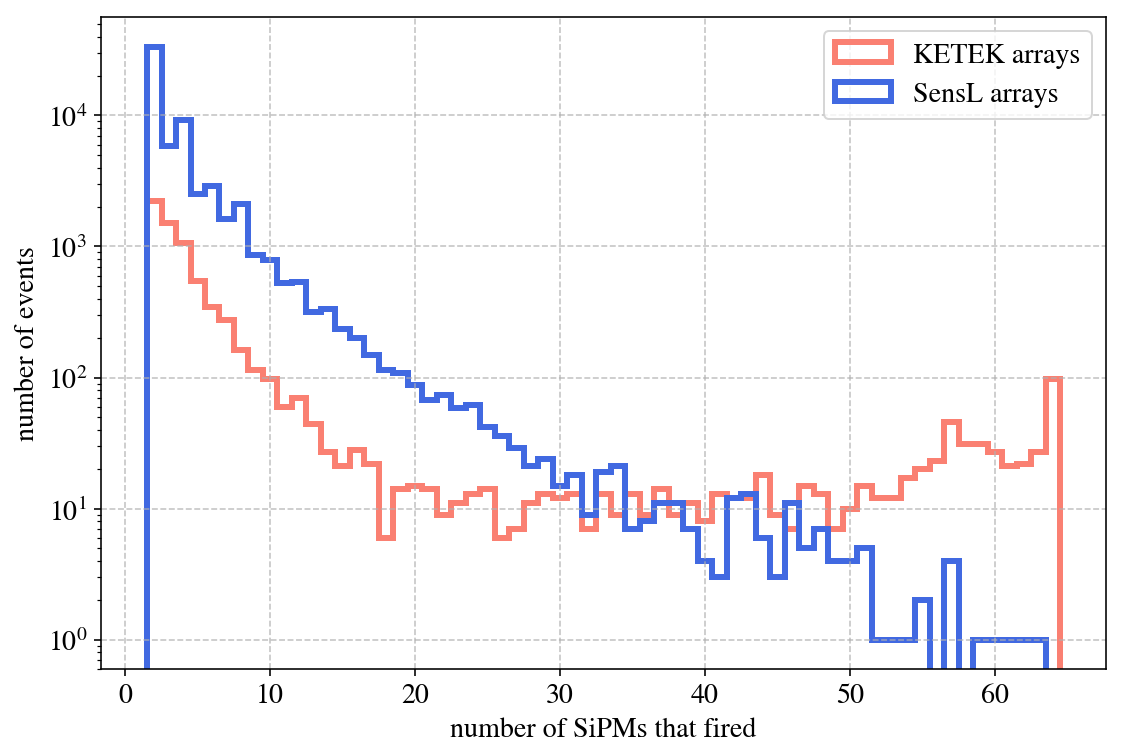

In [70]:
fig,ax=plt.subplots(figsize=(9,6))
plot_discrete_histogram(KETEK_events['N(SiPMs)'],label='KETEK arrays',color='salmon')
plot_discrete_histogram(SensL_events['N(SiPMs)'],label='SensL arrays',color='royalblue')
set_axes(ax,x_label='number of SiPMs that fired',y_label='number of events',
         do_add_grid=True,do_add_legend=True,fontsize=14);
ax.set_yscale('log')

In [81]:
print '%.1f'%(100.*float(len(events[events['det.type']=='unknown']))/len(events))+'% events in unknown detector'

18.2% events in unknown detector


## Rossi-$\alpha$ distribution


In [82]:
t_events_sec = np.array(events['time[ns]']/1e9)
t_events_sec[0:10]

array([0.86966761, 0.88962965, 0.91480381, 0.91599614, 0.92629157,
       0.928983  , 0.94716214, 0.96670938, 0.99099981, 1.0012211 ])

In [83]:
dt_max = 1e6 # count neutron intervals up to 1 ms
t_events = np.sort(np.array(events['time[ns]']))
dt_to_end, dt_up_to_max = dict(), dict()
N = len(t_events)
for i in range(N):    
    t_to_end = t_events[i+1:]
    dt_to_end[i] = t_to_end - t_events[i]
    dt_up_to_max[i] = dt_to_end[i][dt_to_end[i] < dt_max]


dt_pulse_train = np.array([])
for i in range(N):        
    dt_pulse_train = np.concatenate( [dt_pulse_train , dt_up_to_max[i]] );
    if (i%(N/10)==0): print ('%.0f'%(100*float(i)/N) + '%')
print 'done stepping through',len(t_events),'time-stamps in t_events',len(dt_pulse_train),'elements in dt_pulse_train'

0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
100%
done stepping through 85497 time-stamps in t_events 6074 elements in dt_pulse_train


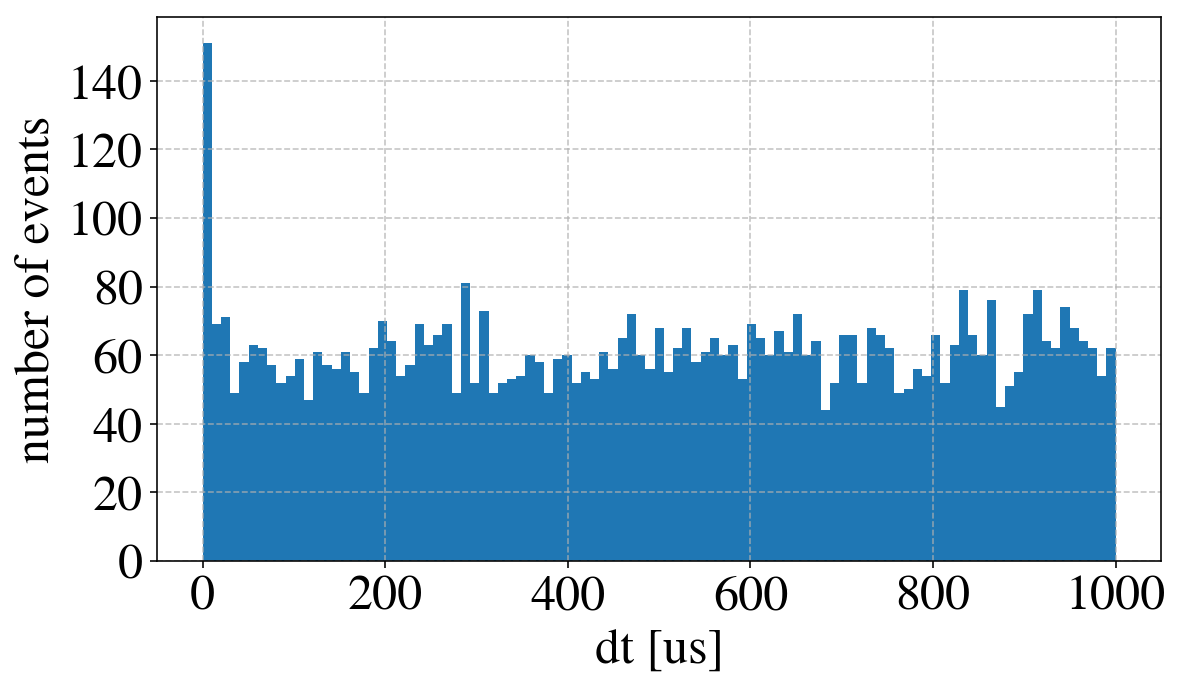

In [84]:
fig,ax=plt.subplots(figsize=(9,5));
plt.hist(dt_pulse_train/1e3 , bins=np.linspace(0,dt_max,100)/1e3);
set_axes(ax,'dt [us]','number of events',do_add_grid=True)
# ax.set_yscale('log')

In [85]:
np.sort(dt_pulse_train)

array([1.29394531e-02, 1.90429688e-02, 5.10101318e-02, ...,
       9.98852510e+05, 9.98998209e+05, 9.99934577e+05])

In [50]:
dt_pulse_train

array([       0.        , 34615999.96899998, 49021833.07799995, ...,
              0.        , 41394094.18899918,        0.        ])

In [37]:
np.max(dt_pulse_train/1e9)

9.986909007101

## find singles, triples, doubles

In [ ]:
gate_dt = 50 # ns
gate_delay = 50 # ns